Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [12]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [6]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [27]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
import pathlib
from pathlib import Path
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train_1")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Test')

In [28]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [13]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 7289 files belonging to 9 classes.
Using 5832 files for training.


In [14]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 7289 files belonging to 9 classes.
Using 1457 files for validation.


In [15]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

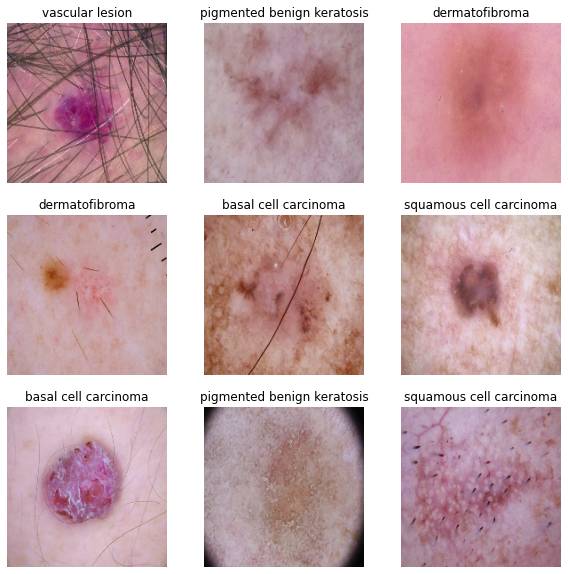

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
58/58 [==============================] - 287s 2s/step - loss: 2.0845 - accuracy: 0.2582 - val_loss: 1.7878 - val_accuracy: 0.3545
Epoch 2/15
58/58 [==============================] - 60s 1s/step - loss: 1.7252 - accuracy: 0.3684 - val_loss: 1.7502 - val_accuracy: 0.3742
Epoch 3/15
58/58 [==============================] - 62s 1s/step - loss: 1.5853 - accuracy: 0.4274 - val_loss: 1.5357 - val_accuracy: 0.4661
Epoch 4/15
58/58 [==============================] - 58s 999ms/step - loss: 1.4293 - accuracy: 0.4951 - val_loss: 1.5895 - val_accuracy: 0.4311
Epoch 5/15
58/58 [==============================] - 60s 1s/step - loss: 1.3644 - accuracy: 0.5218 - val_loss: 1.4156 - val_accuracy: 0.4902
Epoch 6/15
58/58 [==============================] - 60s 1s/step - loss: 1.2514 - accuracy: 0.5622 - val_loss: 1.3526 - val_accuracy: 0.5077
Epoch 7/15
58/58 [==============================] - 58s 997ms/step - loss: 1.1952 - accuracy: 0.5841 - val_loss: 1.3927 - val_accuracy: 0.5011
Epoch 8/15
58

### Visualizing training results

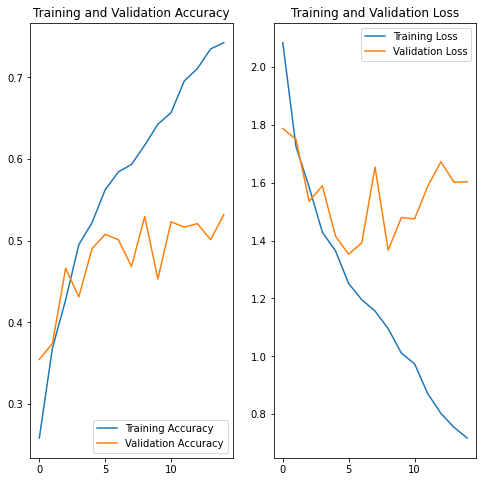

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The training accuracy increases and validation accuracy decreases, the model is overfitting.

#### validation loss keeps increasing with every epoch


### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

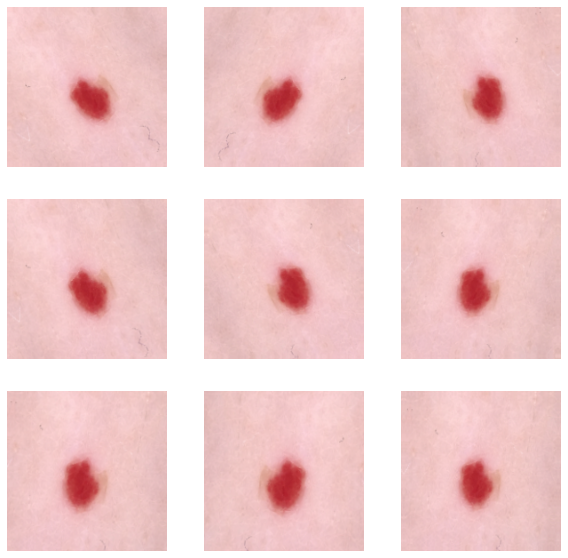

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      2320      
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                      

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
58/58 [==============================] - 151s 3s/step - loss: 1.1965 - accuracy: 0.5781 - val_loss: 1.9276 - val_accuracy: 0.3151
Epoch 2/15
58/58 [==============================] - 171s 3s/step - loss: 1.1828 - accuracy: 0.5715 - val_loss: 1.8547 - val_accuracy: 0.3042
Epoch 3/15
58/58 [==============================] - 153s 3s/step - loss: 1.1867 - accuracy: 0.5704 - val_loss: 1.5754 - val_accuracy: 0.4376
Epoch 4/15
58/58 [==============================] - 151s 3s/step - loss: 1.1231 - accuracy: 0.5868 - val_loss: 1.6681 - val_accuracy: 0.3917
Epoch 5/15
58/58 [==============================] - 151s 3s/step - loss: 1.0857 - accuracy: 0.6064 - val_loss: 1.4795 - val_accuracy: 0.4902
Epoch 6/15
58/58 [==============================] - 153s 3s/step - loss: 1.0815 - accuracy: 0.6157 - val_loss: 1.4898 - val_accuracy: 0.4595
Epoch 7/15
58/58 [==============================] - 151s 3s/step - loss: 1.0477 - accuracy: 0.6184 - val_loss: 1.4483 - val_accuracy: 0.4792
Epoch 8/15
58

### Visualizing the results

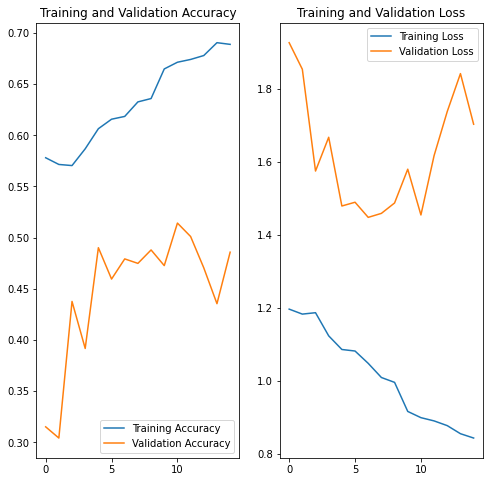

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.


In [ ]:
## Your code goes here.
tf.summary.histogram(
    'Data_distribution', train_ds, step=None,buckets=None, description=None)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

#### **Todo:** Write your findings here: 
pigmented benign keratosis - 462,
melanoma - 438,
basal cell carcinoma - 376,
nevus - 357,
squamous cell carcinoma - 181,
vascular lesion - 139,
dermatofibroma - 95,
seborrheic keratosis - 77.
#### - Which class has the least number of samples?
seborrheic keratosis has least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis - 462,
melanoma - 438,
basal cell carcinoma - 376,
nevus - 357,
these classes dominate the data

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
#path_to_training_dataset="/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train"
#'actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'
import Augmentor
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/actinic keratosis')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/basal cell carcinoma')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/dermatofibroma')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/melanoma')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/nevus')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/pigmented benign keratosis')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/seborrheic keratosis')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
p = Augmentor.Pipeline('/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/vascular lesion')
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 164 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2029922110>: 100%|██████████| 500/500 [00:23<00:00, 20.87 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F202C3C0890>: 100%|██████████| 500/500 [00:23<00:00, 21.18 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2029592C90>: 100%|██████████| 500/500 [00:22<00:00, 21.95 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2034B40190>: 100%|██████████| 500/500 [02:02<00:00,  4.10 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F202F4F3610>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2029684E50>: 100%|██████████| 500/500 [00:23<00:00, 21.39 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F202EC50850>: 100%|██████████| 500/500 [00:54<00:00,  9.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2029637610>: 100%|██████████| 500/500 [00:23<00:00, 21.05 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F20294C30D0>: 100%|██████████| 500/500 [00:23<00:00, 20.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

NameError: ignored

### Lets see the distribution of augmented data after adding new images to the original training data.

In [17]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026645.jpg_fb152129-b224-4307-8d6c-5db3f03b3796.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0025069.jpg_5a24fe7c-0d51-42d8-b76d-0dda5994392f.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0033084.jpg_0b18a210-0ab7-4ae1-a10a-77bb49feff32.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027506.jpg_5a13dd14-e548-412b-bbb7-b407a1fb0cb2.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031738.jpg_60f91301-2f16-4a88-a7d5-dcbfcb9e9022.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Melanoma/Train/squamous cell carcinoma/output/squamou

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [20]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [24]:
from tensorflow import keras
keras.__version__
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma/output")

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [25]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [26]:
data_dir_train=new_df
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  #image_size=(180,180),
  image_size=(img_height, img_width),
  batch_size =32,
  )


Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),
  layers.Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_8 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 batch_normalization_9 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                      

#### **Todo:**  Train your model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 322s 3s/step - loss: 2.4781 - accuracy: 0.2539 - val_loss: 2.1135 - val_accuracy: 0.2744
Epoch 2/30
113/113 [==============================] - 316s 3s/step - loss: 1.5820 - accuracy: 0.4294 - val_loss: 1.9415 - val_accuracy: 0.3044
Epoch 3/30
113/113 [==============================] - 316s 3s/step - loss: 1.4430 - accuracy: 0.4828 - val_loss: 1.7251 - val_accuracy: 0.3644
Epoch 4/30
113/113 [==============================] - 317s 3s/step - loss: 1.3887 - accuracy: 0.5008 - val_loss: 1.7902 - val_accuracy: 0.3722
Epoch 5/30
113/113 [==============================] - 315s 3s/step - loss: 1.3030 - accuracy: 0.5281 - val_loss: 1.4123 - val_accuracy: 0.4689
Epoch 6/30
113/113 [==============================] - 316s 3s/step - loss: 1.2678 - accuracy: 0.5497 - val_loss: 1.4538 - val_accuracy: 0.4689
Epoch 7/30
113/113 [==============================] - 315s 3s/step - loss: 1.2067 - accuracy: 0.5656 - val_loss: 1.2978 - val_accuracy: 0.5400

#### **Todo:**  Visualize the model results

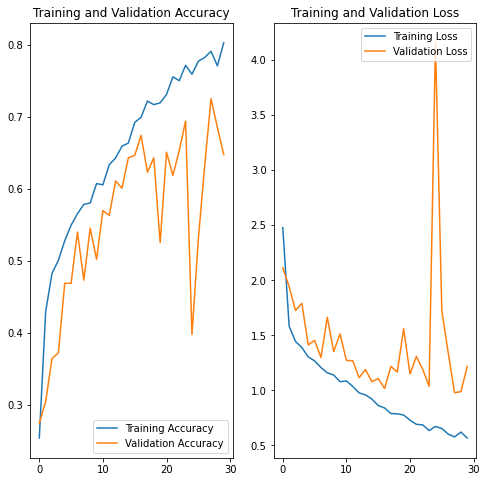

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### The model is overfitting, the class imbalance helped the validation accuracy to improve compared to previous models.

